In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('harry_potter_1000_students.csv')
df.head()

,Blood Status,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,House
0,Half-blood,9,4,7,5,0,8,8,7,Gryffindor
1,Muggle-born,6,8,5,7,5,6,4,9,Ravenclaw
2,Pure-blood,1,4,7,7,1,4,4,6,Hufflepuff
3,Pure-blood,9,1,3,4,1,9,10,1,Gryffindor
4,Muggle-born,5,9,7,3,3,6,7,9,Ravenclaw


In [3]:
df.describe()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,5.026000,5.28100,5.129000,5.136000,4.040000,5.46000,6.223000,5.208000
std,2.682633,2.66179,2.695111,2.716041,3.112248,2.74881,2.833249,2.730969
min,1.000000,1.00000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
25%,3.000000,3.00000,3.000000,3.000000,1.000000,4.00000,4.000000,3.000000
50%,5.000000,5.00000,5.000000,5.000000,3.000000,6.00000,7.000000,5.000000
75%,7.000000,7.00000,7.000000,7.000000,7.000000,7.00000,9.000000,7.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Blood Status         1000 non-null   object
 1   Bravery              1000 non-null   int64 
 2   Intelligence         1000 non-null   int64 
 3   Loyalty              1000 non-null   int64 
 4   Ambition             1000 non-null   int64 
 5   Dark Arts Knowledge  1000 non-null   int64 
 6   Quidditch Skills     1000 non-null   int64 
 7   Dueling Skills       1000 non-null   int64 
 8   Creativity           1000 non-null   int64 
 9   House                1000 non-null   object
dtypes: int64(8), object(2)
memory usage: 78.3+ KB


## Предобработка данных

In [5]:
df.isnull().sum()

Blood Status           0
Bravery                0
Intelligence           0
Loyalty                0
Ambition               0
Dark Arts Knowledge    0
Quidditch Skills       0
Dueling Skills         0
Creativity             0
House                  0
dtype: int64

Видим, что нет отсутствующих значений

Далее преобразуем качественные признаки в числовой формат

In [6]:
df['Blood Status'].unique()

array(['Half-blood', 'Muggle-born', 'Pure-blood'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['Blood Status'] = encoder.fit_transform(df['Blood Status'])

In [10]:
df['Blood Status'].unique()

array([0, 1, 2])

Делаем тоже самое с целевой переменной

In [11]:
df['House'].unique()

array(['Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Slytherin'], dtype=object)

In [12]:
df['House'] = encoder.fit_transform(df['House'])

In [13]:
df['House'].unique()

array([0, 2, 1, 3])

In [14]:
df['House'].value_counts()

House
3    265
2    258
1    251
0    226
Name: count, dtype: int64

Видим, что классы сбалансированы

Далее разделим данные на X и y и поделим их на обучающий и тестовый наборы

In [15]:
X = df.drop('House', axis=1)

In [16]:
y = df['House']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=101)

## Обучение модели SVC

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train, y_train)

SVC()

In [22]:
preds = model.predict(X_test)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

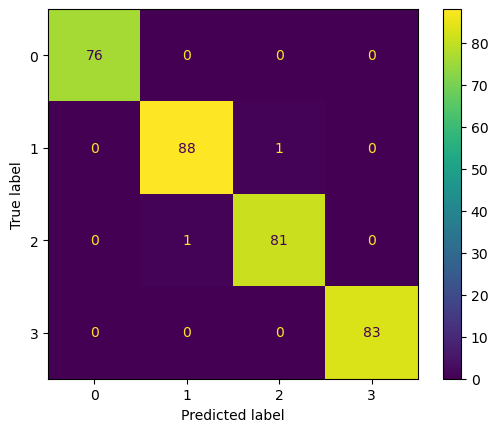

In [24]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.99      0.99      0.99        89
           2       0.99      0.99      0.99        82
           3       1.00      1.00      1.00        83

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



Видим, что с помощью метода опорных векторов удалось достичь хороших результатов

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
preds = model.predict(X_test)

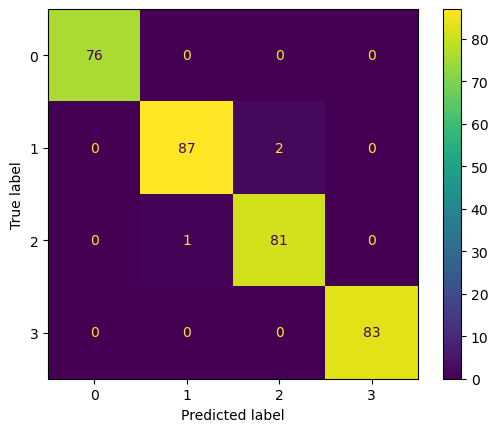

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [31]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.99      0.98      0.98        89
           2       0.98      0.99      0.98        82
           3       1.00      1.00      1.00        83

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



Модель Logistic Regression предсказала чуть хуже(на 1 объект), но тоже очень хорошо

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier()

In [34]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
preds = model.predict(X_test)

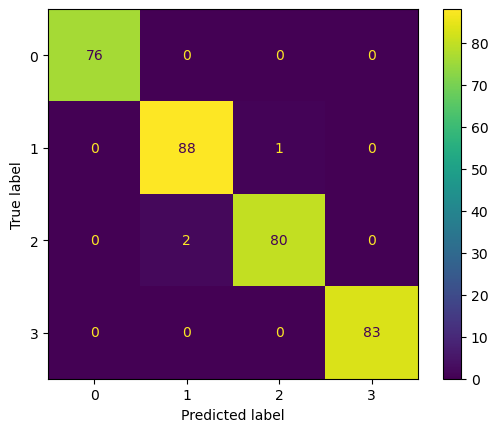

In [36]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.98      0.99      0.98        89
           2       0.99      0.98      0.98        82
           3       1.00      1.00      1.00        83

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



KNN модель предсказала так же, как и Logistic Regression

## Вывод

Все три модели машинного обучения показали хорошие результаты, но на 0.1% по метрикам для классов 1 и 2 лучше себя показал SVC